# Escuela Colombiana de Ingeniería Julio Garavito

## Programming for Data Analysis

## Author

Juan Pablo Sánchez Bermúdez

<hr/>
    <div class="alert alert-success alertsuccess" style="margin-top: 20px">
        <h4> Before start </h4>
        <p>Install the following packages if you are running this notebook in Jupyter.</p>
        <p><code>install.packages('data.table')</code></p>
        <p><code>install.packages("dplyr")</code></p>
        <p><code>install.packages("tidyverse")</code></p>
        <p><code>install.packages("visdat")</code></p>
        <p><code>install.packages("ggplot2")</code></p>
    </div>
<hr/>

In [1]:
# Imports
library(data.table)
library(dplyr)
#library(tidyverse)
library(visdat) # visualize missing data
library(devtools)


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: usethis



# Alzheimer Features Data Set

### 1. Selecting and loading Data Set
I chose the [Alzheimer Features](https://www.kaggle.com/datasets/brsdincer/alzheimer-features) Data Set from Kaggle because I wanted to analyze another data set from scratch.

Group &rarr; Class

M/F &rarr; Male / Female

Age &rarr; Age

EDUC &rarr; Years of Education

SES &rarr; Socioeconomic Status / 1-5

MMSE &rarr; Mini Mental State Examination

CDR &rarr; Clinical Dementia Rating

eTIV &rarr; Estimated total intracranial volume

nWBV &rarr; Normalize Whole Brain Volume

ASF &rarr; Atlas Scaling Factor

In [2]:
# dataFrame <- read.table(file='alzheimer.csv',header=TRUE, sep=',')
dataFrame <- fread('alzheimer.csv')

# Rename M/F column
colnames(dataFrame)[2] <- "Gender"

head(dataFrame)

Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
Nondemented,M,87,14,2,27,0.0,1987,0.696,0.883
Nondemented,M,88,14,2,30,0.0,2004,0.681,0.876
Demented,M,75,12,NA,23,0.5,1678,0.736,1.046
Demented,M,76,12,NA,28,0.5,1738,0.713,1.010
Demented,M,80,12,NA,22,0.5,1698,0.701,1.034
Nondemented,F,88,18,3,28,0.0,1215,0.710,1.444


### 2. Missing values
Now that the data frame is set, let's get details about the missing values of the data frame.
  - Columns with missing values
  - Rows with missing values
  - A percentage of records with missing values
  - Graphics to visualize missing information

In [3]:
missingValues <- function(df) {
    newDf <- data.frame(df)
    print("Rows and Columns with missing values respectively")
    size <- dim(df)
    count <- 0
    state <- FALSE
    for (row in 1:size[1]) {
        for (column in 1:size[2]) {
            if (newDf[row, column] %in% NA) {
                print(paste(row, column))
                state <- TRUE
            }
        }
        if (state) {
            count <- count + 1
            state <- FALSE
        }
    }
    percentage <- (count * 100) / size[1]
    print("------------------------------------------------------")
    print(paste(sprintf("The percentage of records with missing values is %.2f", percentage), "%"))
    print("------------------------------------------------------")
    print("Graphic to visualize missing information")
    vis_dat(df)
}

[1] "Rows and Columns with missing values respectively"
[1] "3 5"
[1] "4 5"
[1] "5 5"
[1] "11 5"
[1] "12 5"
[1] "13 5"
[1] "135 5"
[1] "136 5"
[1] "208 5"
[1] "209 5"
[1] "238 5"
[1] "239 5"
[1] "323 5"
[1] "324 5"
[1] "357 5"
[1] "358 5"
[1] "358 6"
[1] "359 5"
[1] "359 6"
[1] "360 5"
[1] "361 5"
[1] "------------------------------------------------------"
[1] "The percentage of records with missing values is 5.09 %"
[1] "------------------------------------------------------"
[1] "Graphic to visualize missing information"


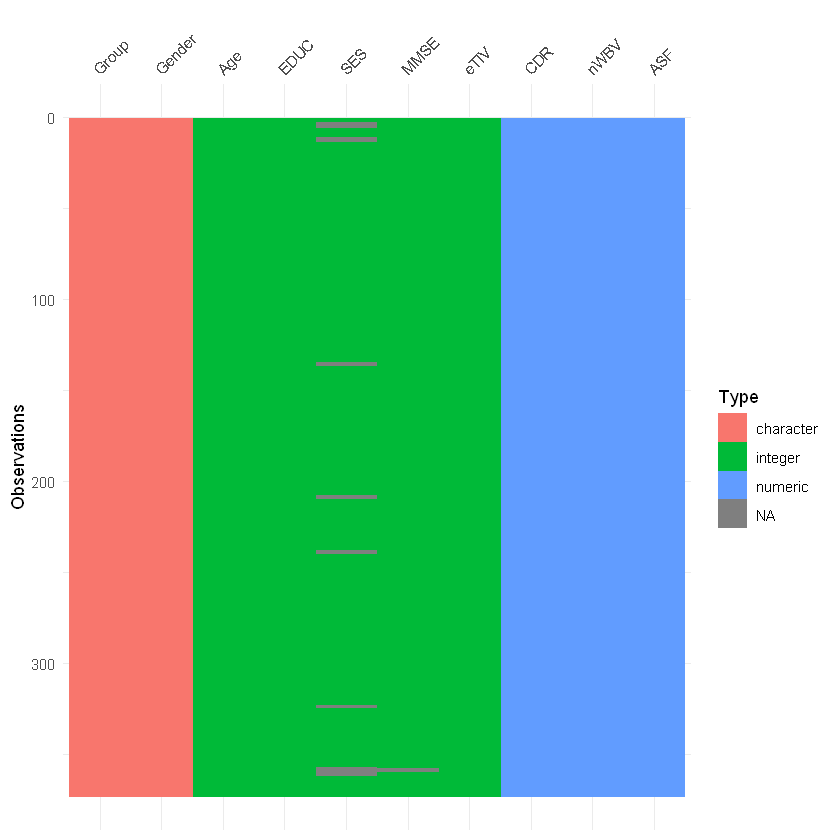

In [4]:
missingValues(dataFrame)

### 3. Imputing Missing Data
We saw above that the data frame has missing values, so now let's impute data to the missing values using three strategies, mean, median and mode.

In [5]:
# Create mode function
myMode <- function(df) {
    newDf <- data.frame(df)
    size <- dim(newDf)
    for (column in 1:size[2]) {
        columnMode <- sort(table(newDf[, column]), decreasing=TRUE)[1]
        for (row in 1:size[1]) {
            if (newDf[row, column] %in% NA) {
                newDf[row, column] <- as.numeric(names(columnMode))
            }
        }
    }
    return(newDf)
}

naValues <- function(df, s) {
    newDf <- data.frame(df)
    size <- dim(newDf)
    for (row in 1:size[1]) {
        for (column in 1:size[2]) {
            if (newDf[row, column] %in% NA) {
                newDf[row, column] <- s[column - 2]
            }
        }
    }
    return(newDf)
}

imputeData <- function(df, s) {
    if (s == "mean") {
        meanColumns <- colMeans(dataFrame[,3:10], na.rm=TRUE) # 3:10 due it only recives numeric values and column 1 and 2 are not numeric
        newDf <- naValues(df, meanColumns)
    } else if (s == "median") {
        medianColumns <- apply(dataFrame[,3:10], 2, median, na.rm=TRUE) # colMedians didn't work
        newDf <- naValues(df, medianColumns)
    } else if (s == "mode") {
        newDf <- myMode(df)
    } else {
        print("You typed a wrong word!")
        newDf <- df
    }
    return(newDf)
    
}

##### Note: The myMode function was taken from https://www.youtube.com/watch?v=iBM2Wyfs03w
Let's call the imputeData function and visualize if there are not NA values calling the ```missingValues``` function.

Type a strategie: mean
[1] "Rows and Columns with missing values respectively"
[1] "------------------------------------------------------"
[1] "The percentage of records with missing values is 0.00 %"
[1] "------------------------------------------------------"
[1] "Graphic to visualize missing information"


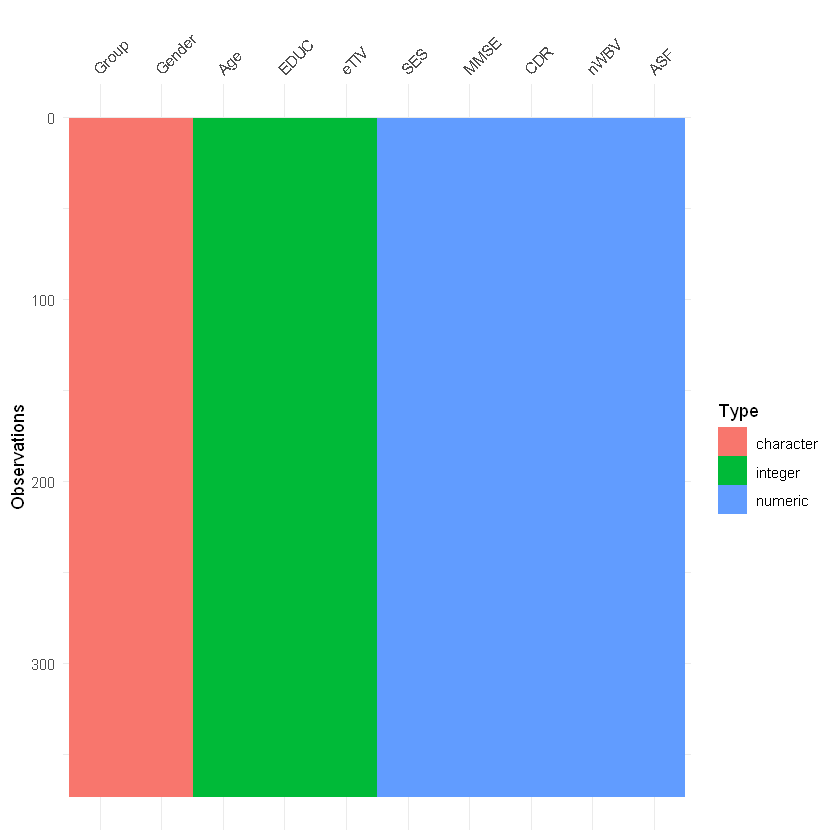

In [6]:
input <- readline(prompt="Type a strategie: ")
newDf <- imputeData(dataFrame, input)
missingValues(newDf)

Correlation https://cran.r-project.org/web/packages/visdat/readme/README.html